In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [28]:
indian = pd.read_csv('data/pima-indian.csv')
indian.head()

,pregnant,glucose,blood,thickness,insulin,bmi,pedigree,age,diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
indian.diabete.value

0    500
1    268
Name: diabete, dtype: int64

### 피마인디언 당뇨병 예측

* 고립된 지역인 피마 지역의 인디언들은 고유의 혈통이 지속되어 왔지만, 20세기 후반 강제 이주정책으로 인해 서구화된 식습관으로 많은 당뇨병 환자가 생겨남

* diabetes 테이터 셋 구조

* 임신횟수, 포도당부하검사, 혈압, 삼두근피하지방측정값, 인슐린농도, 비만지수, 당뇨내력가중치, 나이, 5년내 당뇨발병여부(0:음성)

In [57]:
data = indian.iloc[:,0:7]
target = indian.iloc[:, 8]

In [58]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, train_size=0.7, random_state=2111051155)

In [59]:
lrclf = LogisticRegression(max_iter=150)
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

In [60]:
print(f1_score(pred,ytest))

0.6527777777777778


In [61]:
print(classification_report(pred, ytest))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       168
           1       0.58      0.75      0.65        63

    accuracy                           0.78       231
   macro avg       0.74      0.77      0.75       231
weighted avg       0.81      0.78      0.79       231



In [62]:
accuracy_score(pred, ytest)

0.7835497835497836

In [63]:
pred_proba = lrclf.predict_proba(Xtest)[:,1]

In [64]:
df = pd.DataFrame()
df['ytest'] = ytest  # 실제값
df['FP proba'] = pred_proba  # 특이도FP 확률
df['pred'] = pred  # 예측값
df.head()

,ytest,FP proba,pred
243,1,0.423546,0
144,0,0.506063,1
456,0,0.303784,0
145,0,0.006807,0
237,1,0.852908,1


In [65]:
fprs,tprs, thresholds = roc_curve(ytest, pred_proba)

In [66]:
print('미발병예측', fprs[:10], fprs.shape)
print('발병예측', tprs[:10], fprs.shape)

미발병예측 [0.         0.         0.         0.00666667 0.00666667 0.02
 0.02       0.03333333 0.03333333 0.04      ] (68,)
발병예측 [0.         0.01234568 0.14814815 0.14814815 0.25925926 0.25925926
 0.30864198 0.30864198 0.37037037 0.37037037] (68,)


In [50]:
roc = pd.DataFrame({'1-FPR':fprs, 'TPR':tprs, 'Threshold':thresholds})
roc.head()

,1-FPR,TPR,Threshold
0,0.000000,0.000000,1.963353
1,0.000000,0.012346,0.963353
2,0.000000,0.074074,0.933875
3,0.006667,0.074074,0.925309
4,0.006667,0.259259,0.762854


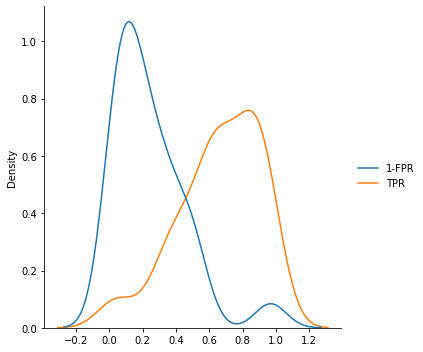

In [67]:
sns.displot(roc.iloc[:, [0,1]], kind='kde')

In [68]:
optidx = np.argmax(tprs-fprs)
optths = thresholds[optidx]
optths 

0.32260868292251266

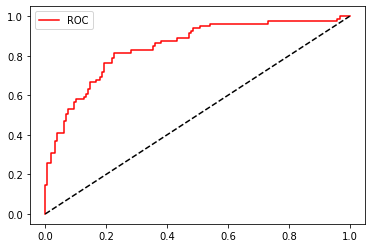

In [69]:
plt.plot(fprs, tprs, 'r', label='ROC')
plt.plot([0,1],[0,1], 'k--')
plt.legend()

In [70]:
roc_auc_score(ytest, pred)

0.7367901234567901

In [72]:
confusion_matrix(ytest, pred)

array([[134,  16],
       [ 34,  47]])

### 유방암 진찰 예측

In [96]:
from sklearn.datasets import load_breast_cancer

In [97]:
cancer = load_breast_cancer()

In [98]:
data = cancer.data
target = cancer.target

In [94]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [106]:
list(cancer.target_names) # 악성-0/정상

['malignant', 'benign']

In [109]:
list(cancer.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [108]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [111]:
pd.Series(cancer.target).value_counts()

1    357
0    212
dtype: int64

In [112]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, train_size=0.7, stratify=target, random_state=2111051505)

In [113]:
lrclf = LogisticRegression(max_iter=150)
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)

/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [114]:
print(f1_score(ytest, pred))

0.9813084112149533


In [115]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [116]:
accuracy_score(pred, ytest)

0.9766081871345029

In [117]:
recall_score(pred, ytest)

0.9813084112149533

In [119]:
confusion_matrix(pred,ytest)

array([[ 62,   2],
       [  2, 105]])

In [120]:
pred_proba = lrclf.predict_proba(Xtest)[:,1]
fprs, tprs, _= roc_curve(ytest, pred_proba)

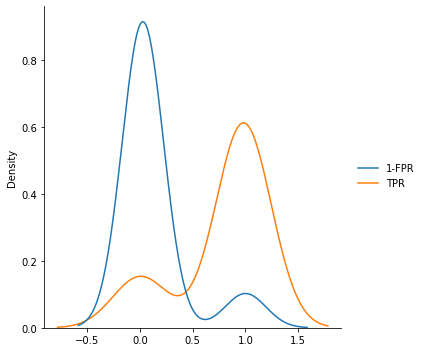

In [122]:
roc = pd.DataFrame({'1-FPR':fprs, 'TPR':tprs})
sns.displot(roc.iloc[:, [0,1]], kind='kde')

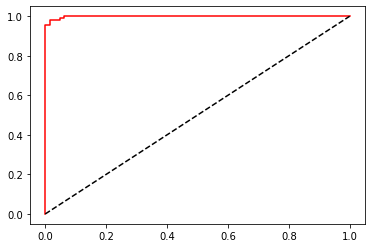

In [123]:
plt.plot(fprs, tprs, 'r', label='ROC')
plt.plot([0,1], [0,1], 'k--')